In [1]:
import sys
sys.path.append('../../..')
from viz.match_data import extract_match_complete
from viz.pass_network import plot_pass_network
from viz.pass_analysis import plot_pass_flow, plot_pass_hull
from viz.shot_xg import plot_shot_xg
from viz.shot_map_report import plot_shot_report
from viz.stats_table import create_player_analysis_complete
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# === CONFIGURACIÓN DEL PARTIDO ===
WS_ID = 1913968
US_ID = 29239
LEAGUE = 'ESP-La Liga'
SEASON = '25-26'
HOME_TEAM = 'Atletico'
AWAY_TEAM = 'Osasuna'
MATCH_DATE = '2025-10-18'

# === RUTAS DE LOGOS ===
HOME_LOGO_PATH = '../logos/LaLiga/Atleti.png'
AWAY_LOGO_PATH = '../logos/LaLiga/Osasuna.png'

# === COLORES DE EQUIPOS ===
HOME_COLORS = ['#D00027', '#FFFFFF']  # Atletico Madrid: rojo, blanco
AWAY_COLORS = ['#D00027', '#000080']  # Osasuna: rojo, azul oscuro

In [3]:
# Extracción completa de datos
result = extract_match_complete(
    ws_id=WS_ID,
    us_id=US_ID,
    league=LEAGUE,
    season=SEASON,
    home_team=HOME_TEAM,
    away_team=AWAY_TEAM,
    match_date=MATCH_DATE
)


Extracting: Atletico vs Osasuna (2025-10-18)
--------------------------------------------------
1. match_events.csv: 1854 events
2. player_network.csv: 306 records
3. match_aggregates.csv: 69 records
4. spatial_analysis.csv: 50 spatial records
5. match_info.csv: 94 info records

Shots: 27 | Goals: 1 | xG: 2.77


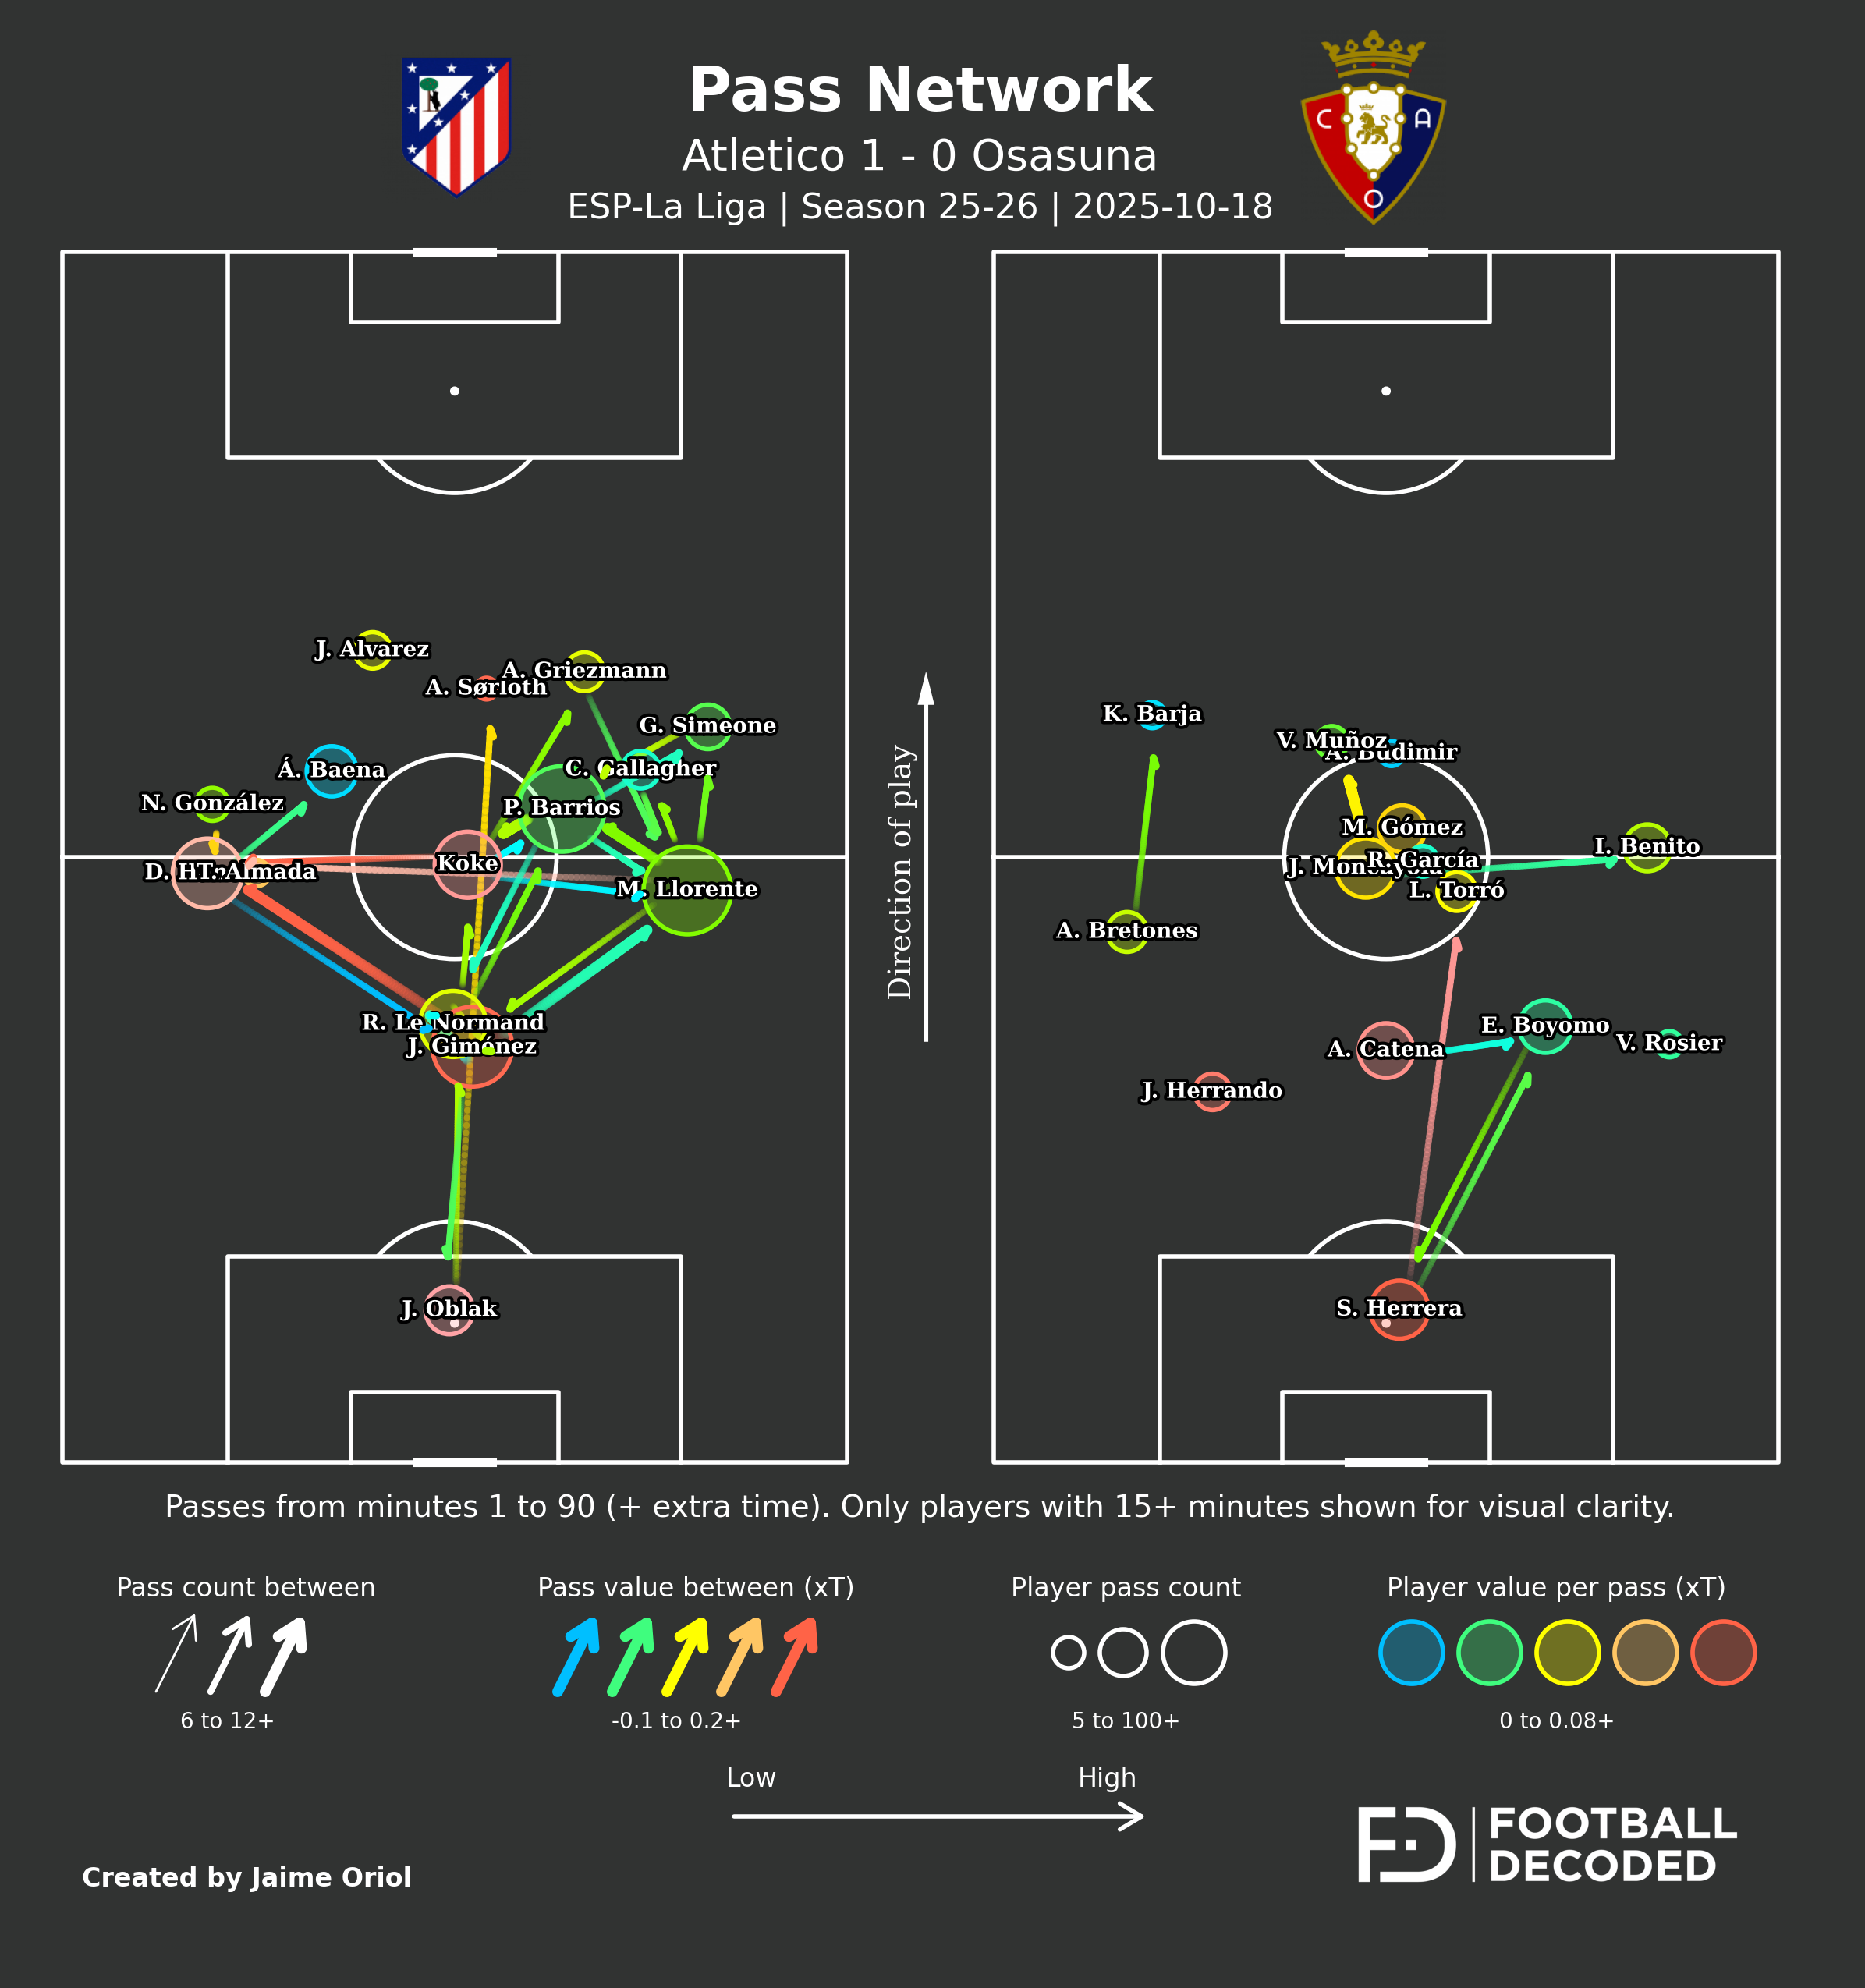

In [4]:
fig_network = plot_pass_network(
    network_csv_path='../../viz/data/player_network.csv',
    info_csv_path='../../viz/data/match_info.csv',
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH
)

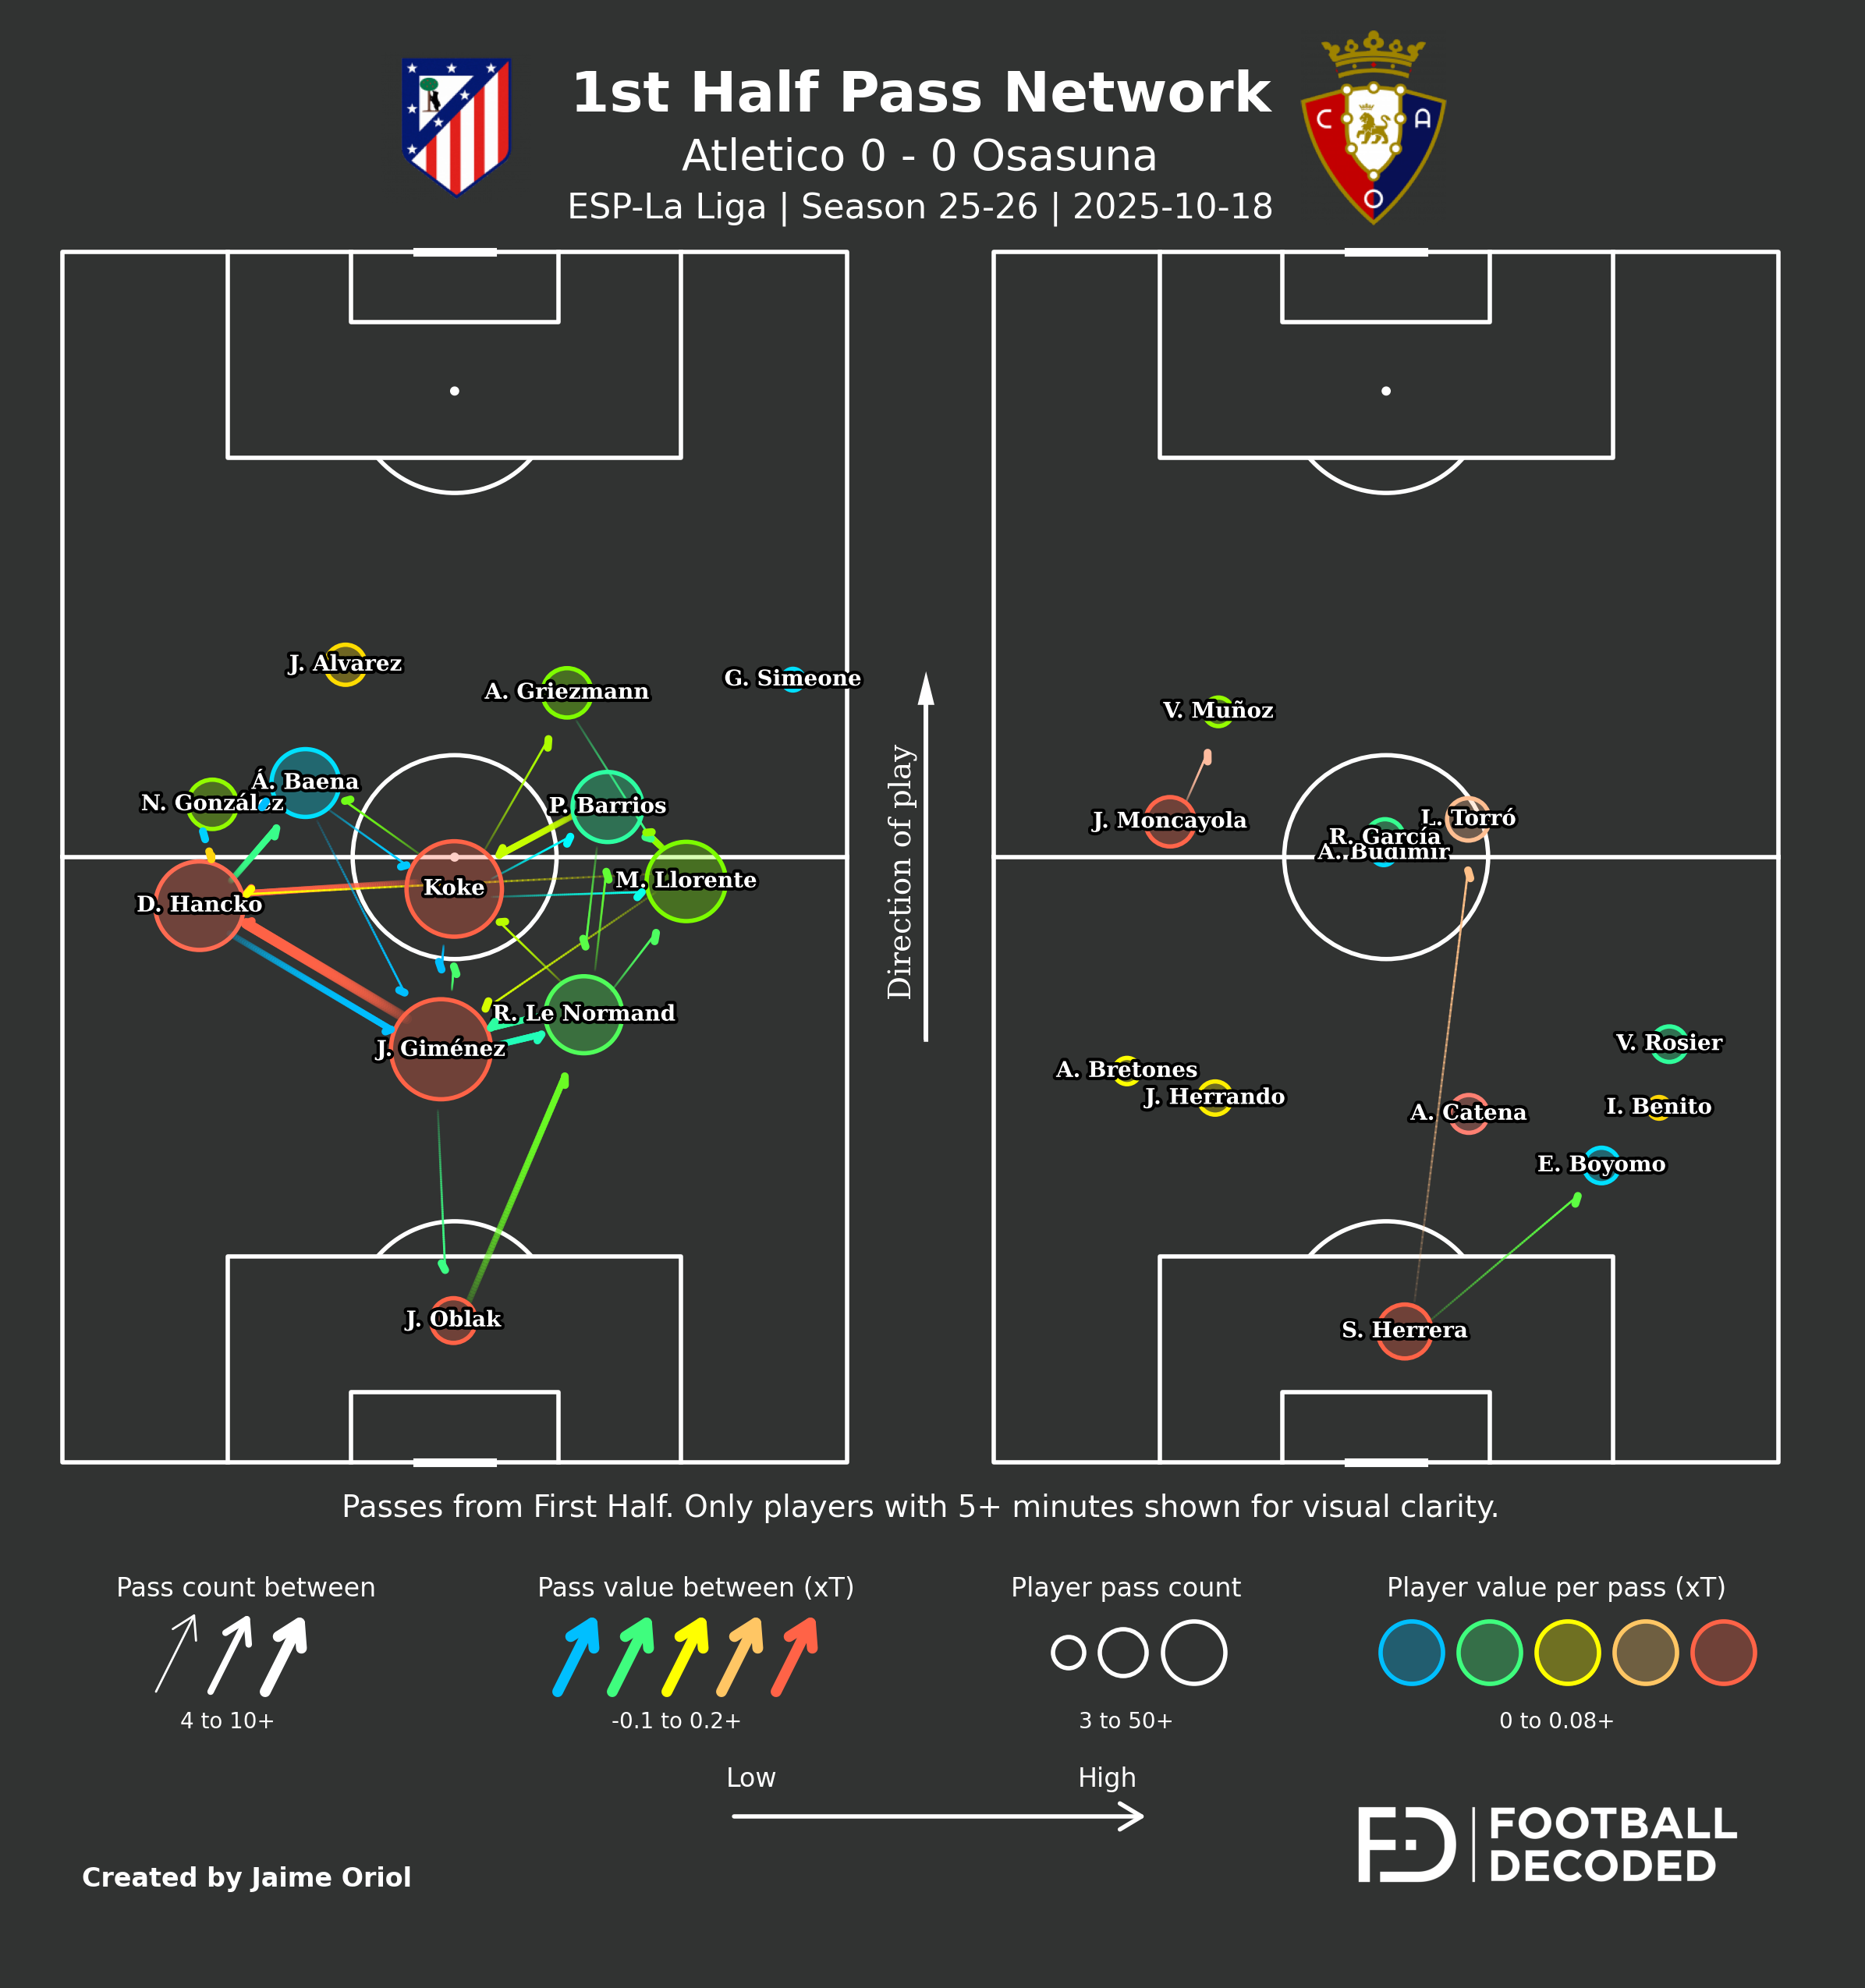

In [5]:
# Pass network primer tiempo (jugadores >5 minutos primer tiempo)
from viz.pass_network import plot_pass_network_first_half
fig_network_44 = plot_pass_network_first_half(
    network_csv_path='../../viz/data/player_network.csv',
    info_csv_path='../../viz/data/match_info.csv',
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH
)

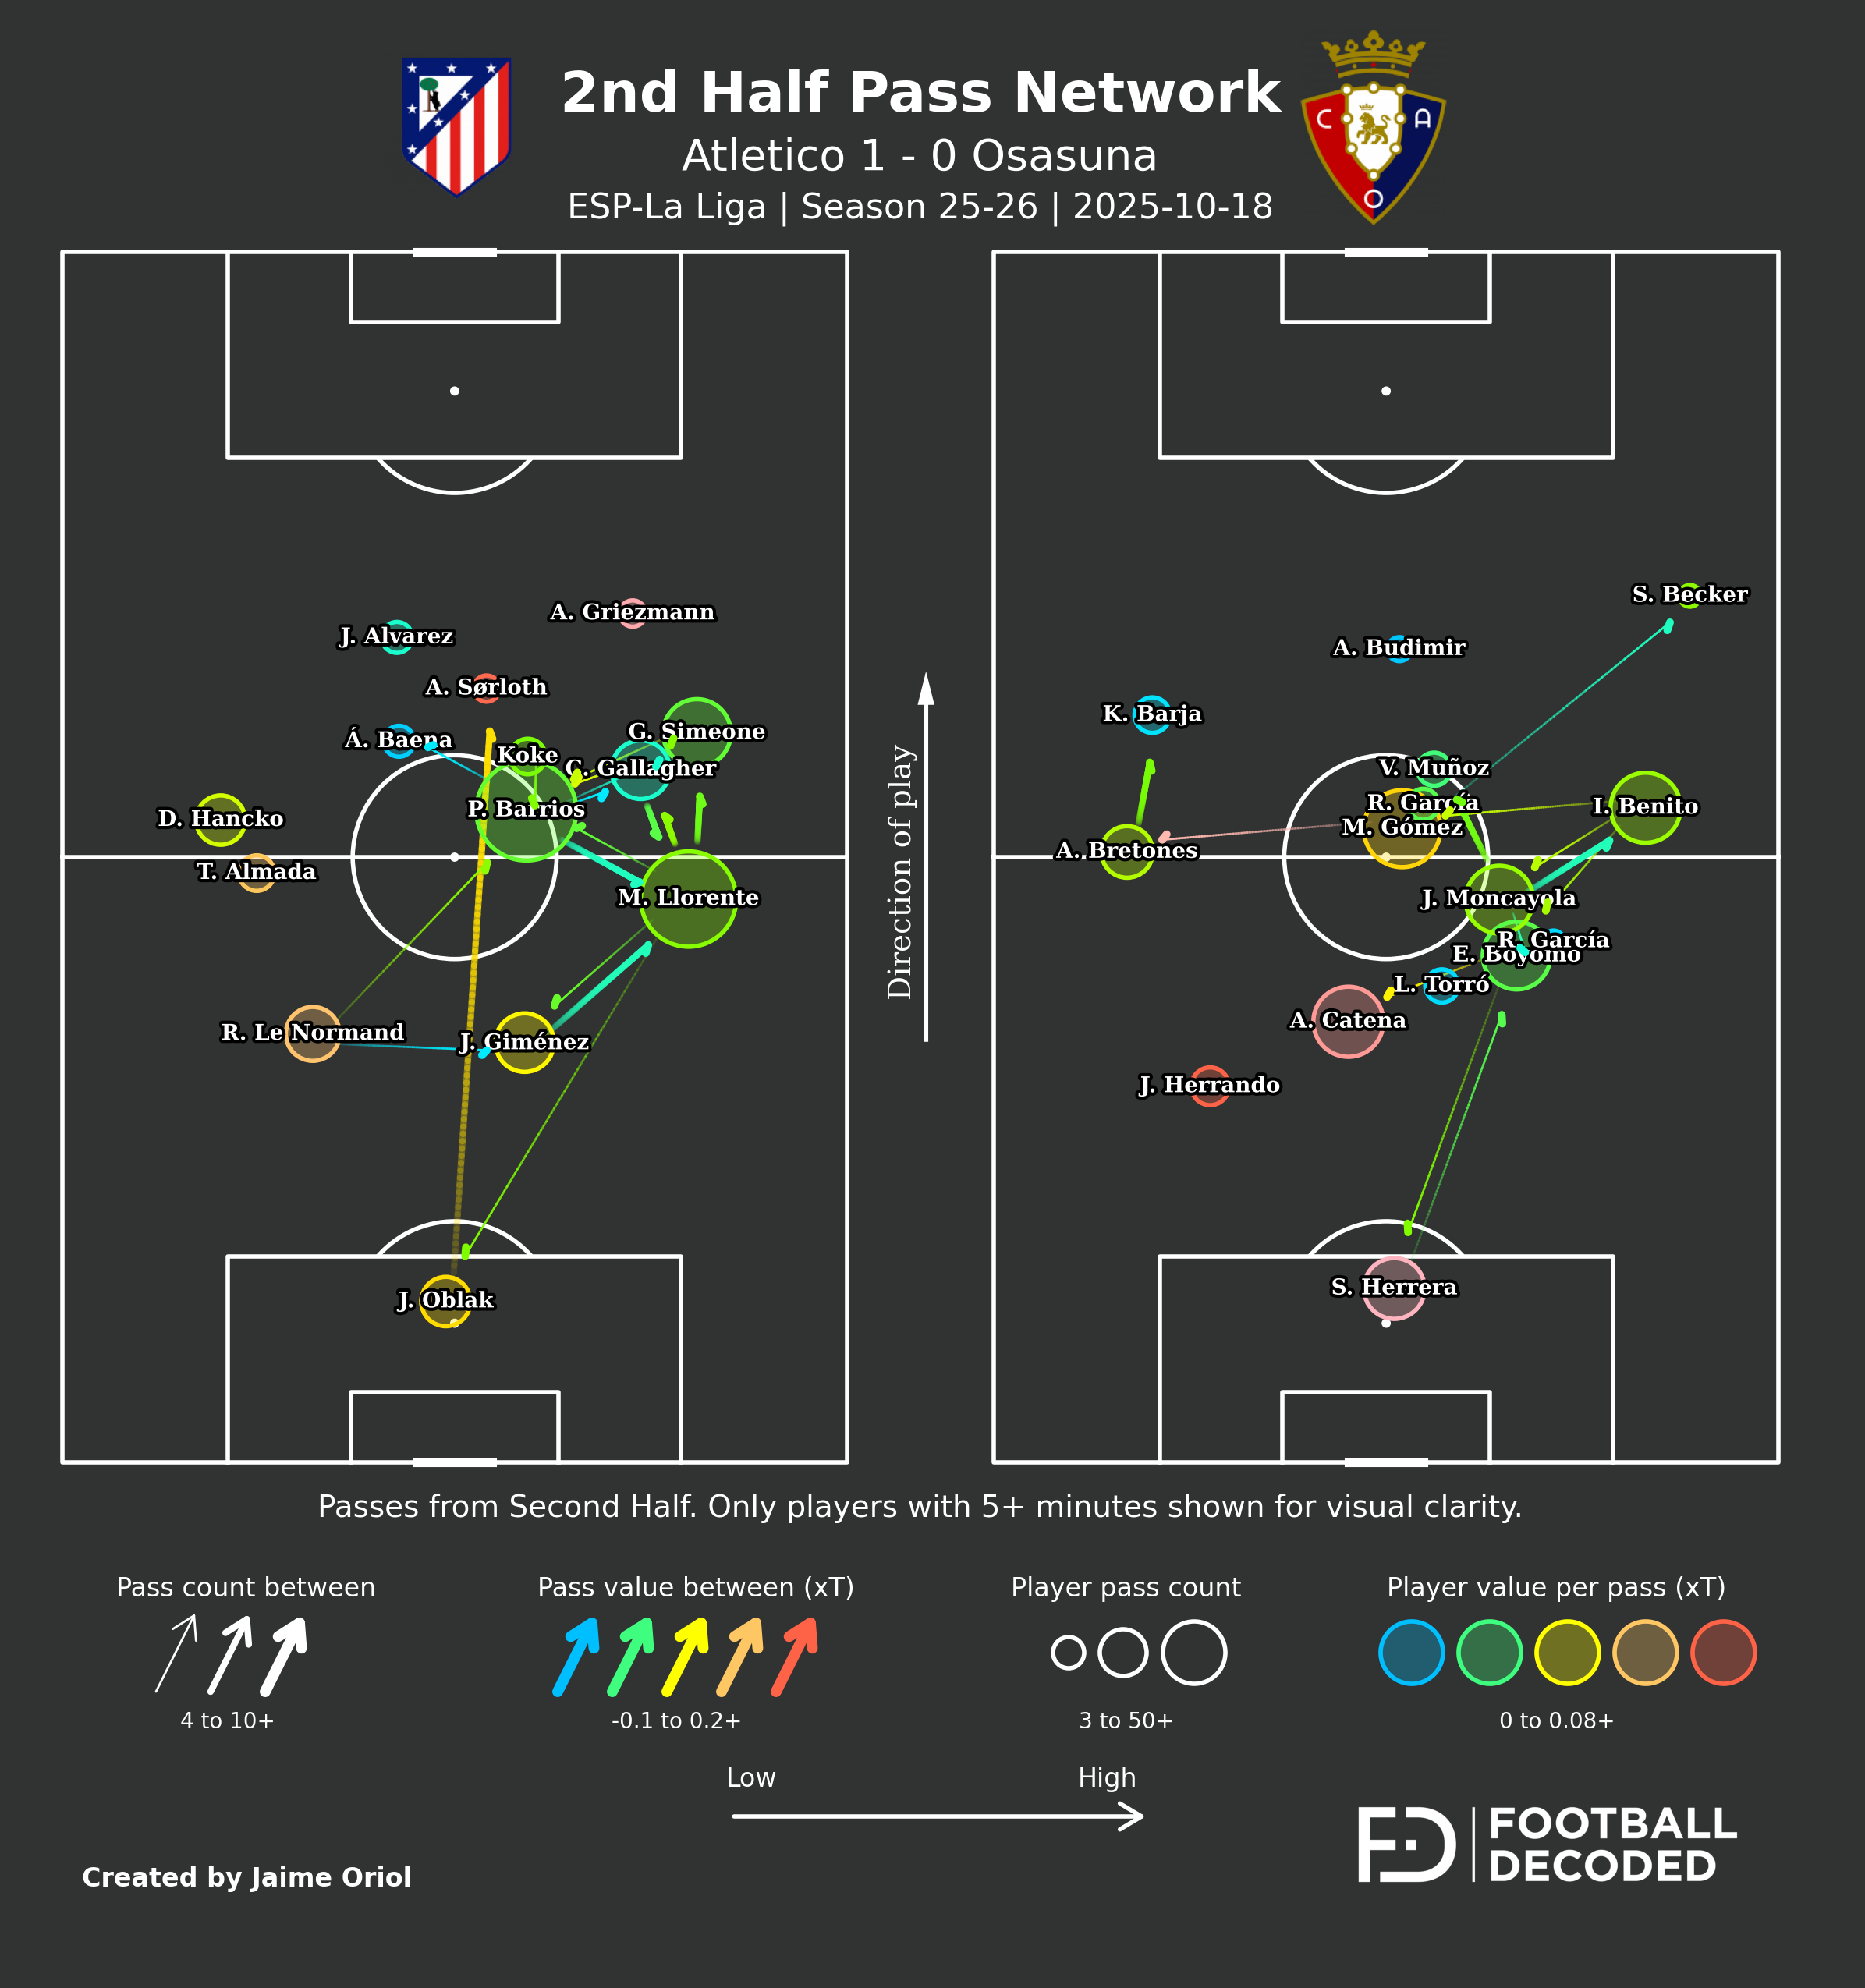

In [6]:
# Pass network segundo tiempo (jugadores >5 minutos segudno tiempo)
from viz.pass_network import plot_pass_network_second_half
fig_network_90 = plot_pass_network_second_half(
    network_csv_path='../../viz/data/player_network.csv',
    info_csv_path='../../viz/data/match_info.csv',
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH
)

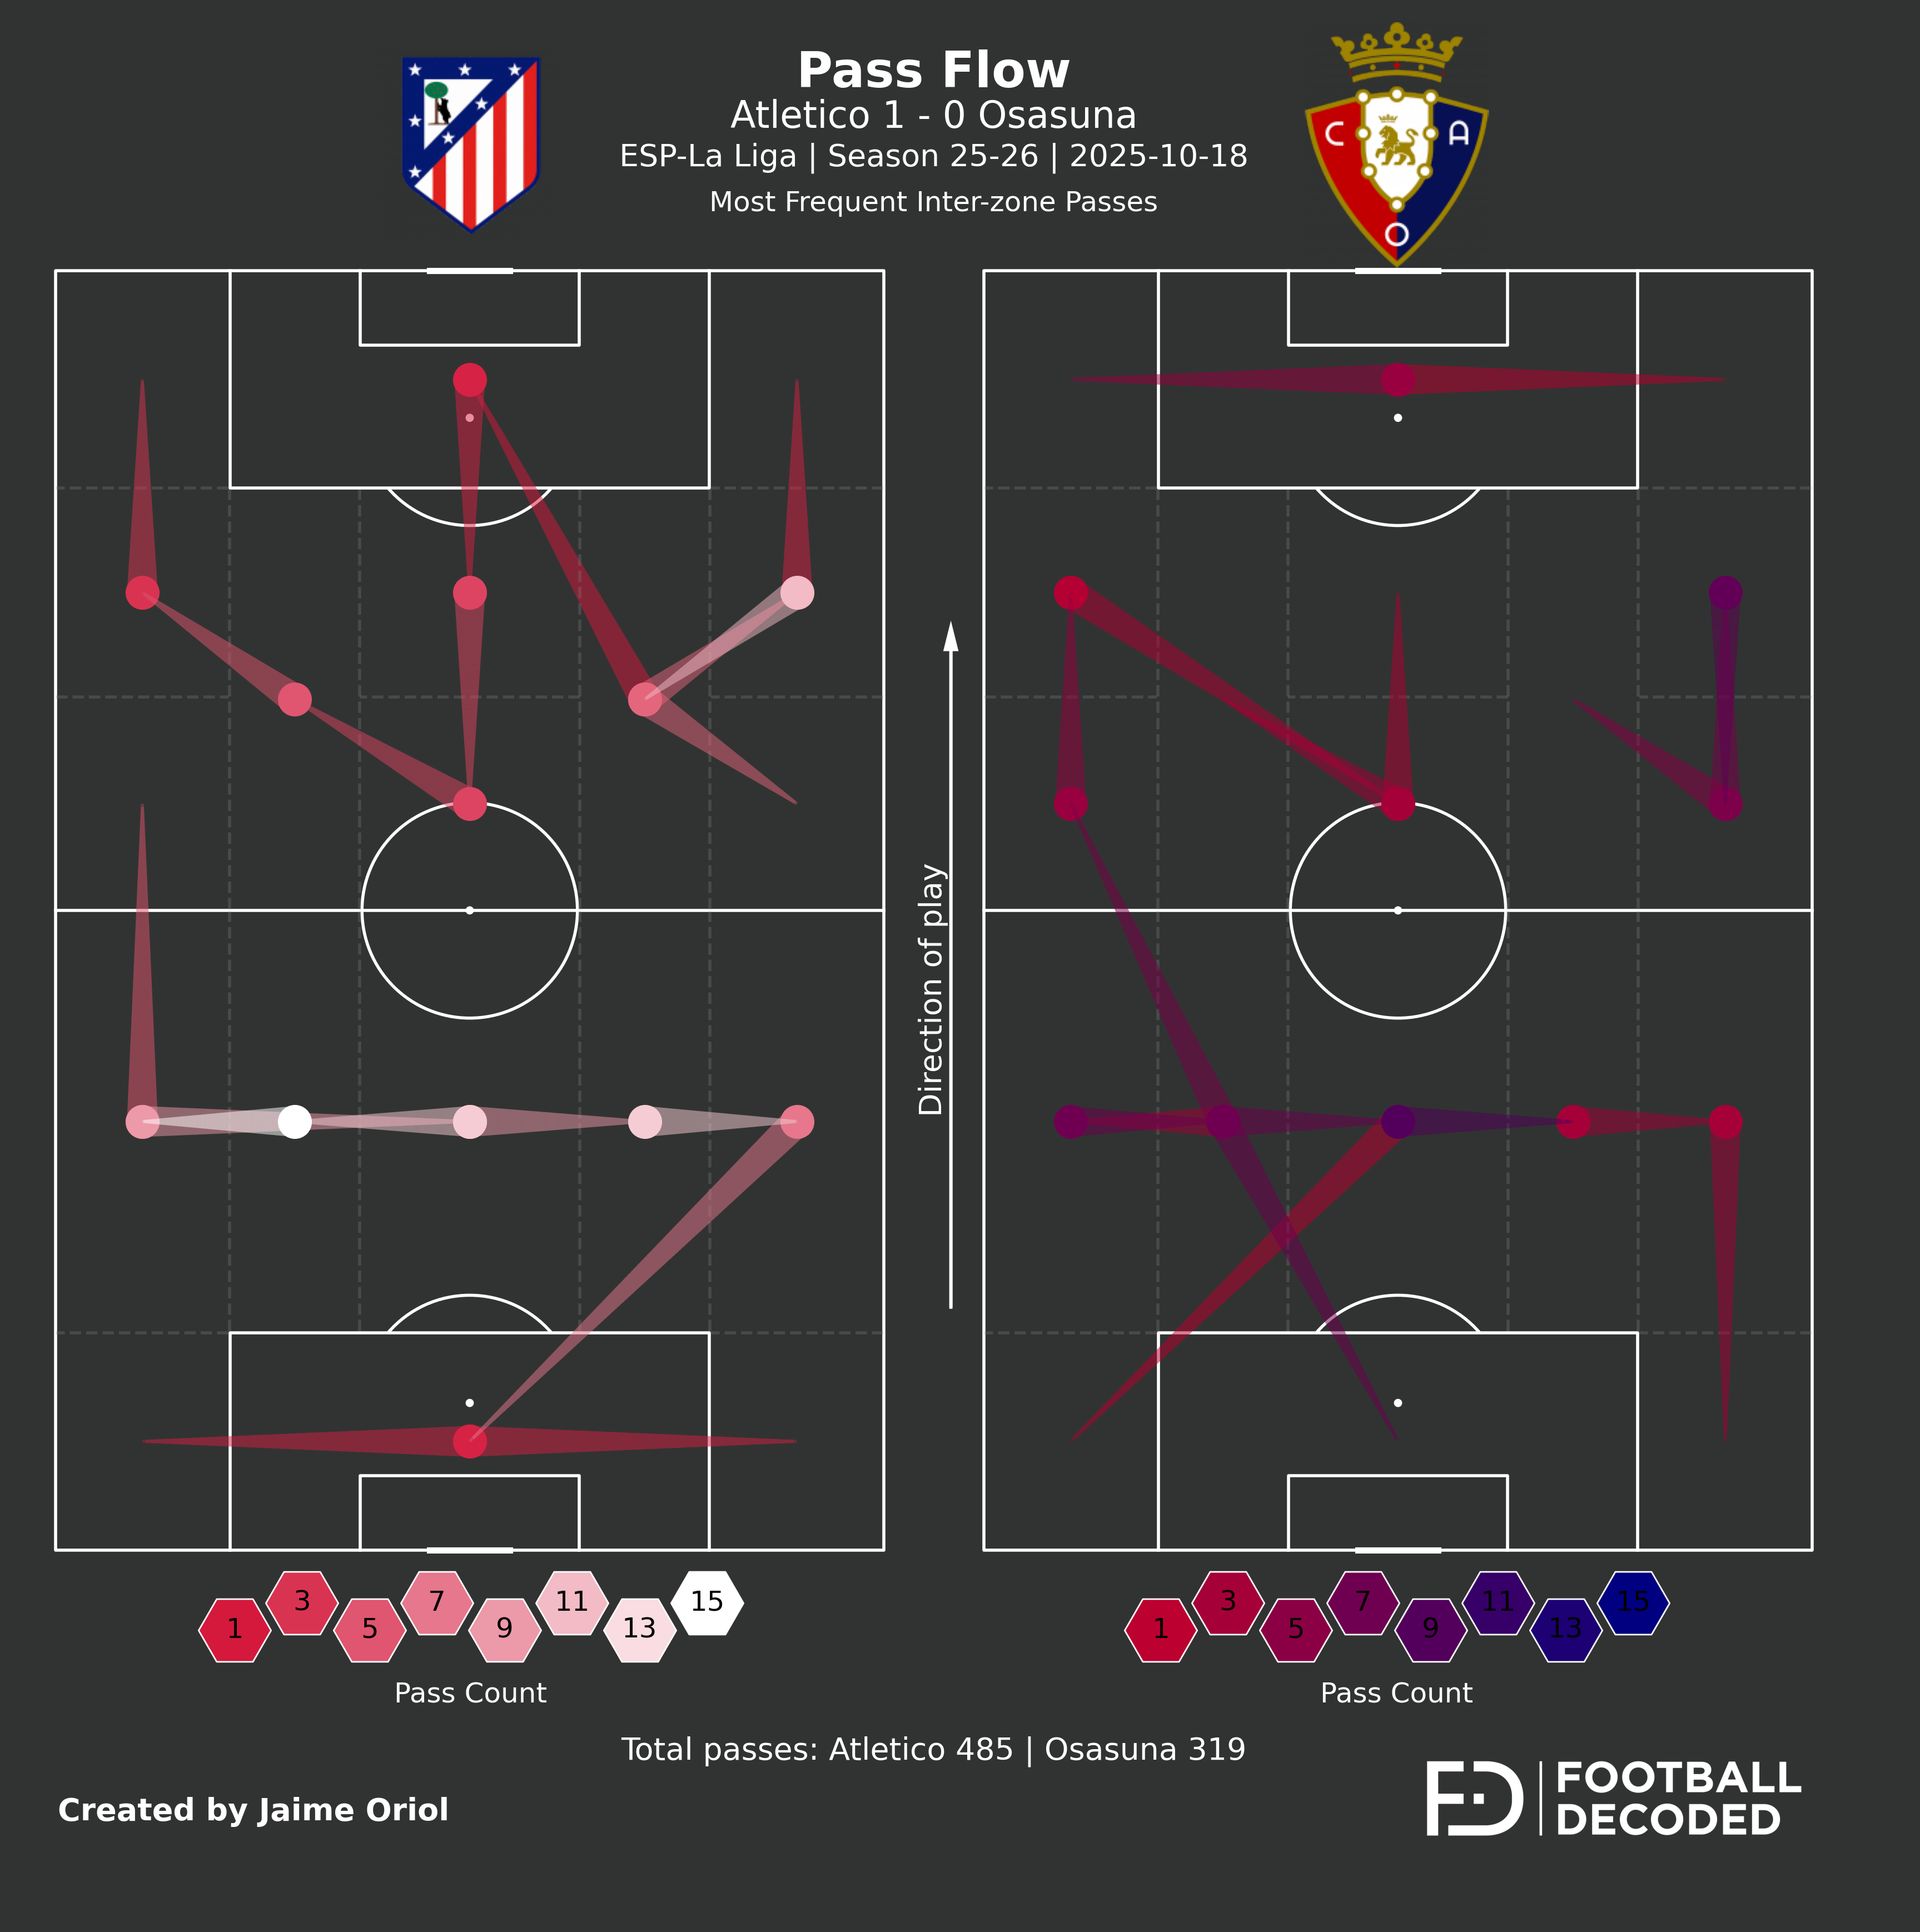

In [7]:
# Pass Flow
fig_flow = plot_pass_flow(
    events_csv_path='../../viz/data/match_events.csv',
    info_csv_path='../../viz/data/match_info.csv',
    home_colors=HOME_COLORS,
    away_colors=AWAY_COLORS,
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH
)

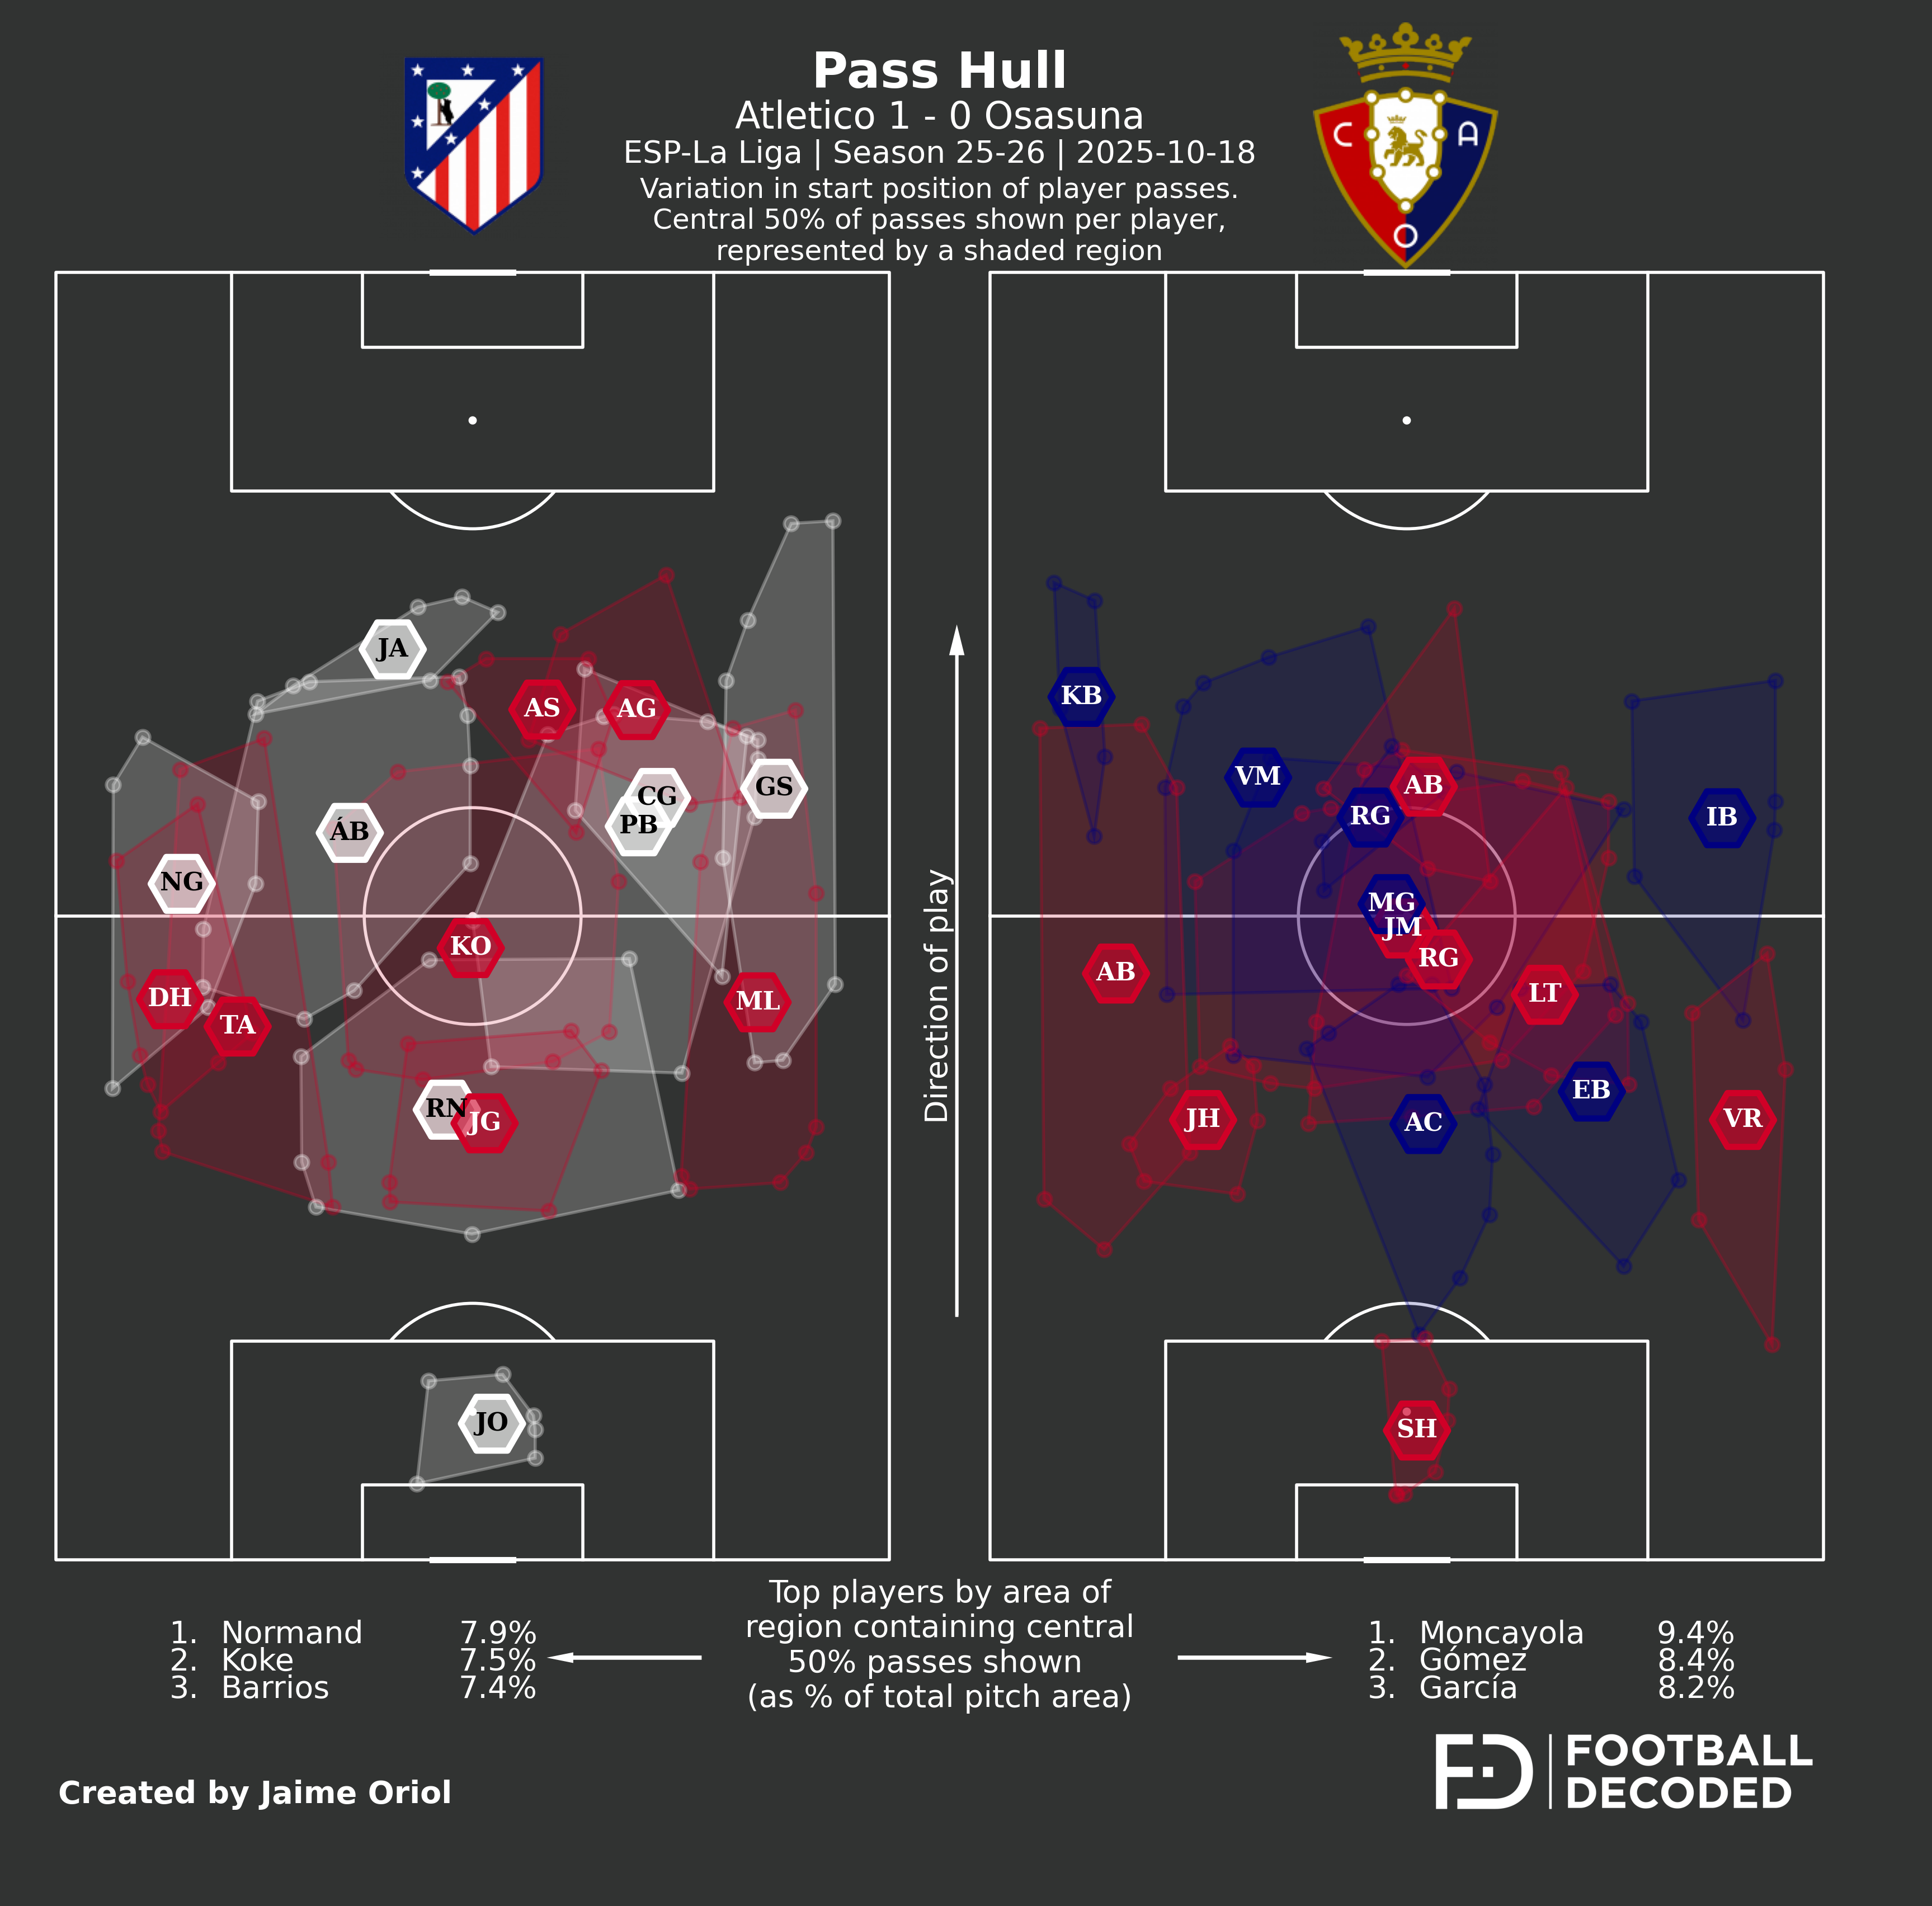

In [8]:
# Pass Hull
fig_hull = plot_pass_hull(
    events_csv_path='../../viz/data/match_events.csv',
    info_csv_path='../../viz/data/match_info.csv',
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_colors=HOME_COLORS,
    away_colors=AWAY_COLORS,
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH
)

Disparos: 27 | Goles: 1 | xG: 2.768


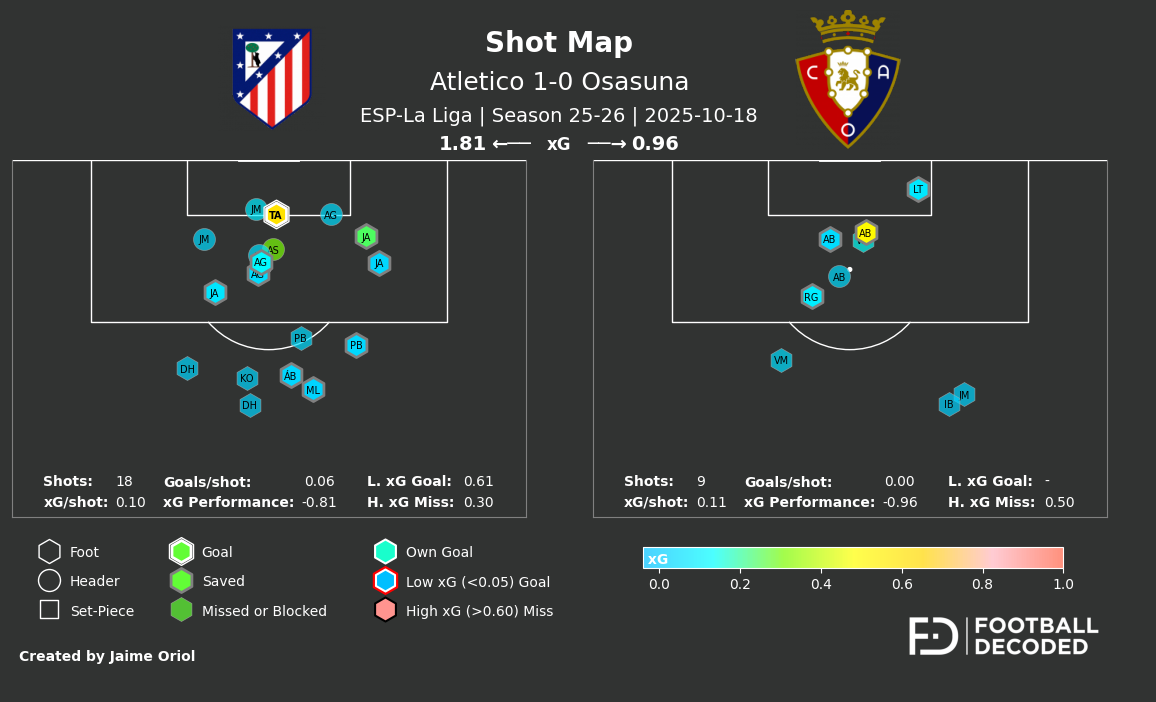

In [9]:
# Preparar datos de disparos
def create_shots_csv():
    events = pd.read_csv('../../viz/data/match_events.csv')
    shots = events[events['event_type'].str.contains('Shot|Goal', case=False, na=False)].copy()
    shots['is_goal'] = shots['event_type'] == 'Goal'
    shots['body_part'] = shots['qualifiers'].str.contains('Head', na=False).map({True: 'Head', False: 'Foot'})
    shots['xg'] = pd.to_numeric(shots['xg'], errors='coerce').fillna(0.0)
    shots.to_csv('../../viz/data/shots_temp.csv', index=False)
    print(f"Disparos: {len(shots)} | Goles: {shots['is_goal'].sum()} | xG: {shots['xg'].sum():.3f}")
    return shots

shots_data = create_shots_csv()

# Shot Map Report
fig_report = plot_shot_report(
    csv_path='../../viz/data/shots_temp.csv',
    home_logo_path=HOME_LOGO_PATH,
    away_logo_path=AWAY_LOGO_PATH,
    season='Season 25-26 | 2025-10-18'
)

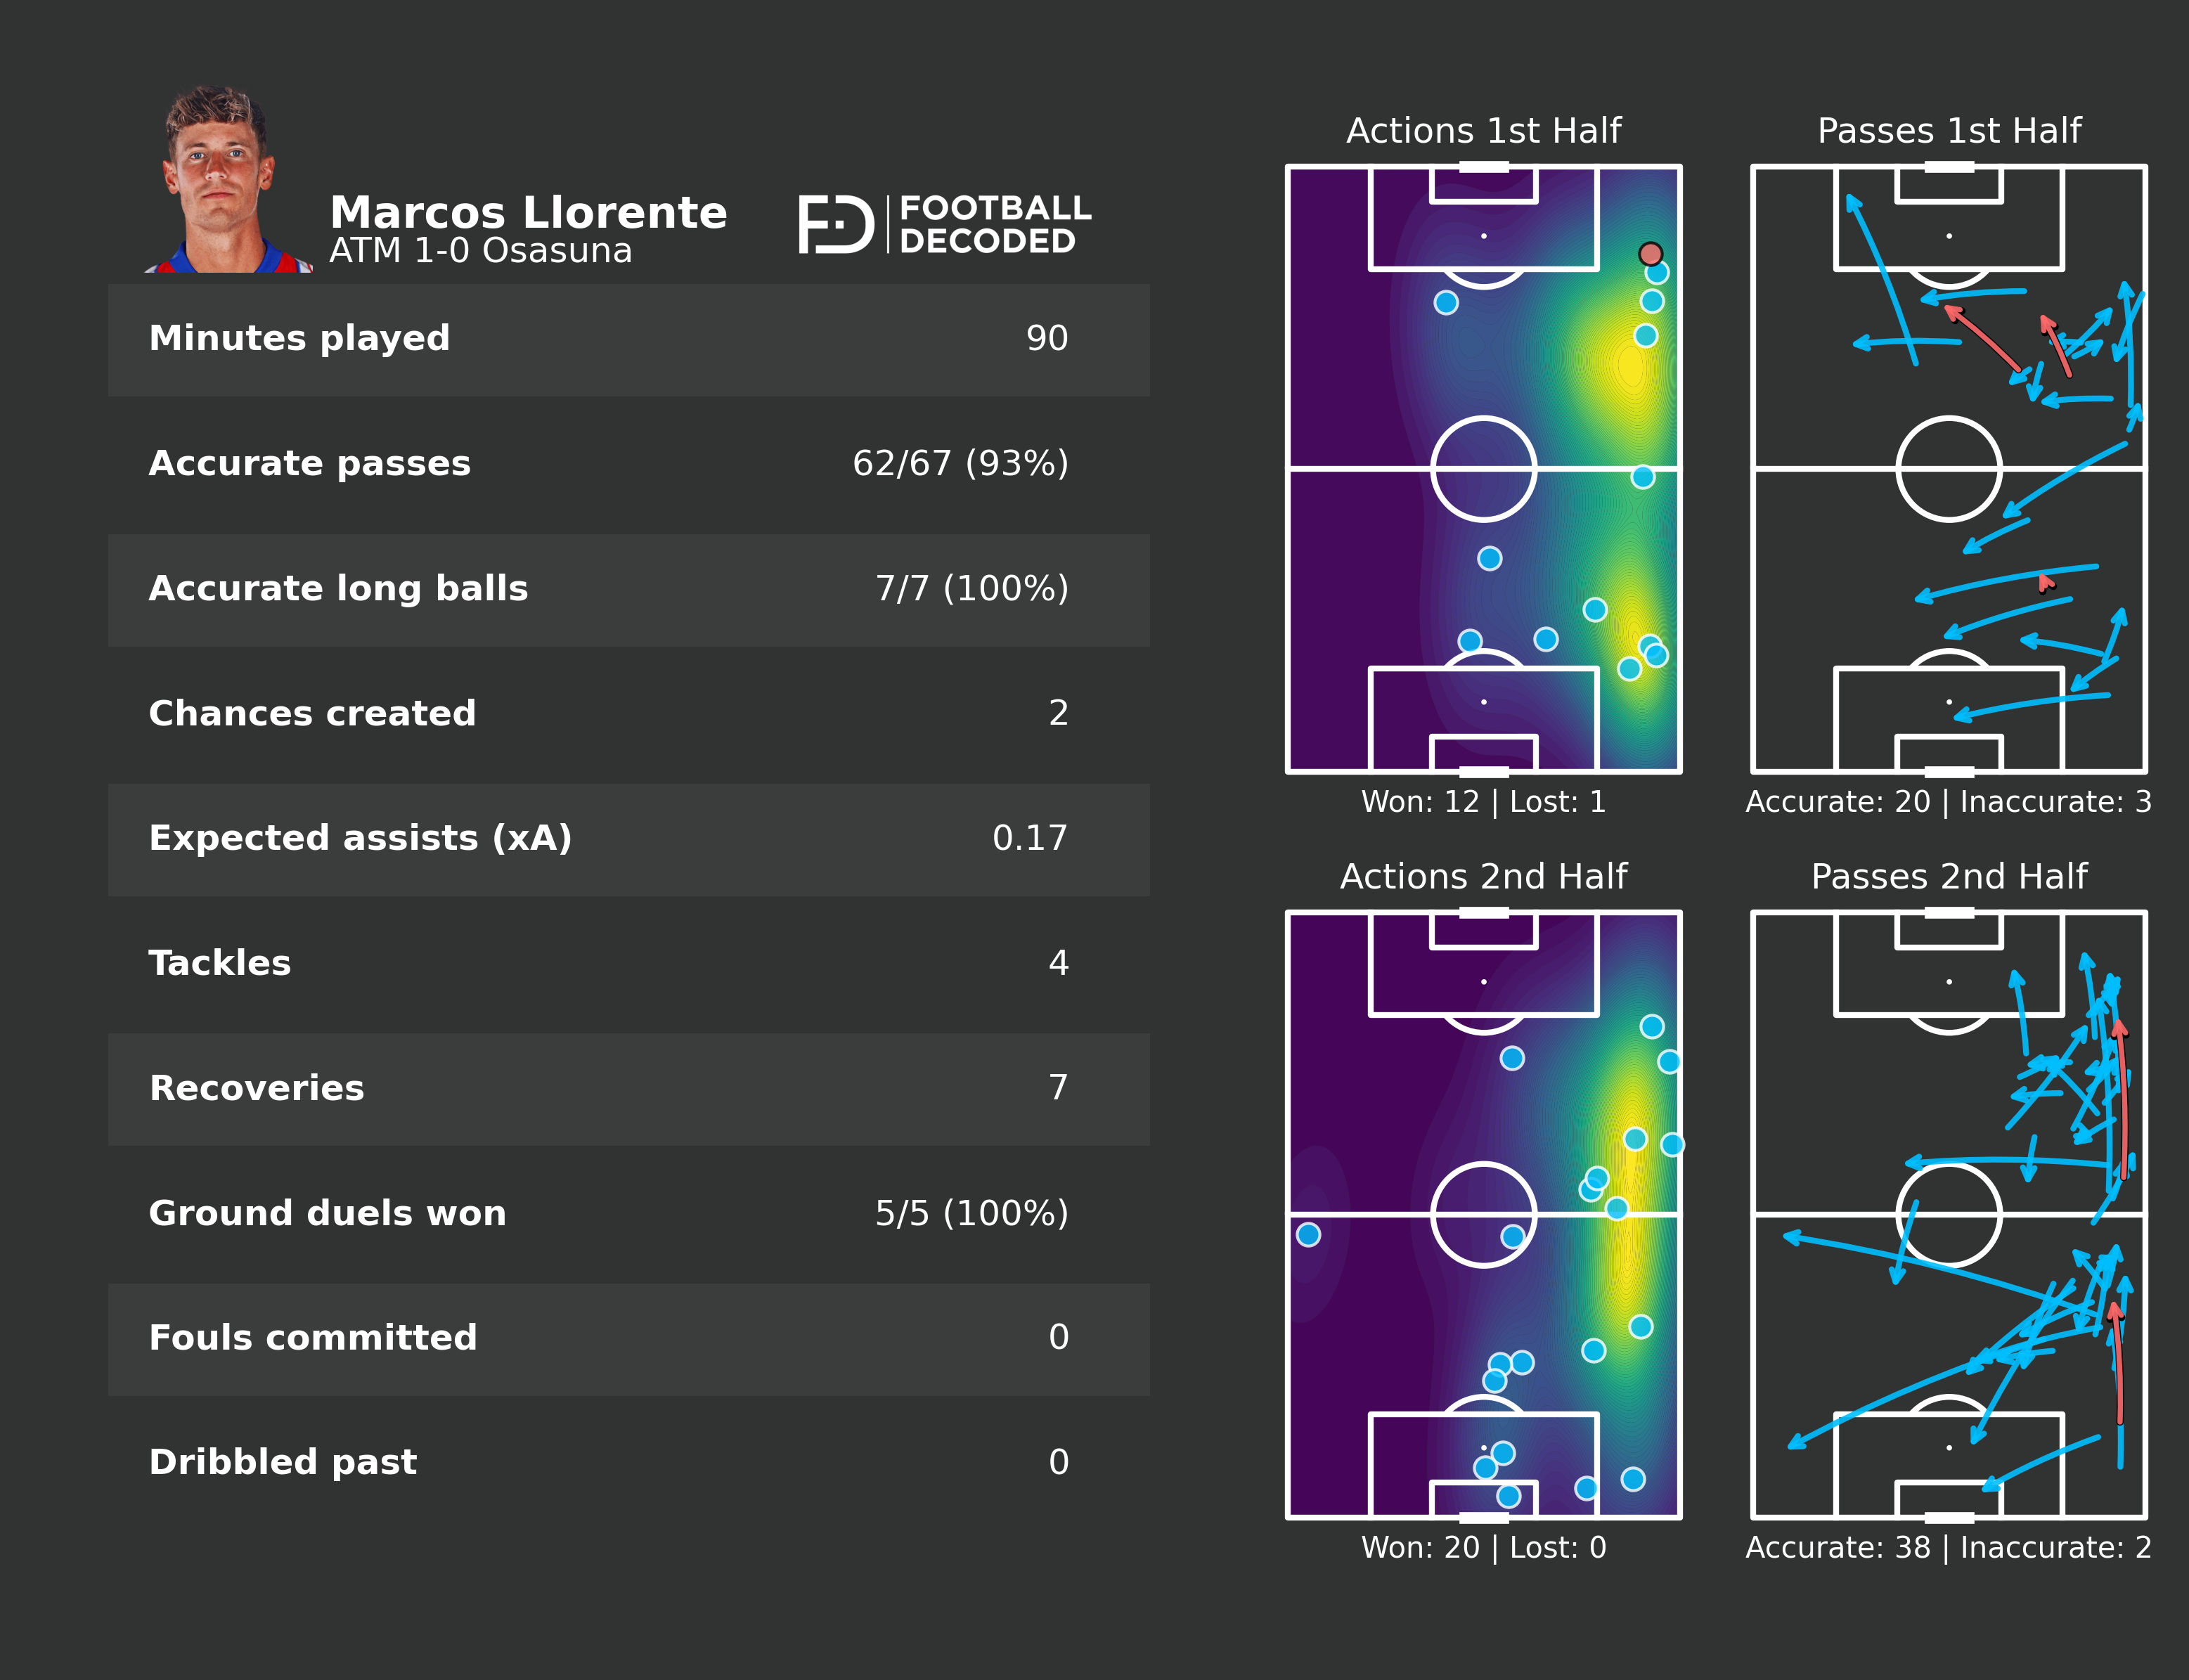

In [14]:
# MARCOS LLORENTE - Centrocampista
events = pd.read_csv('../../viz/data/match_events.csv')
aggregates = pd.read_csv('../../viz/data/match_aggregates.csv')

llorente_enriched = [
    ("Minutes played", "90"),
    ("Accurate passes", "62/67 (93%)"),
    ("Accurate long balls", "7/7 (100%)"),
    ("Chances created", "2"),
    ("Expected assists (xA)", "0.17"),
    ("Tackles", "4"),
    ("Recoveries", "7"),
    ("Ground duels won", "5/5 (100%)"),
    ("Fouls committed", "0"),
    ("Dribbled past", "0")
]

fig_llorente = create_player_analysis_complete(
    player_name='Marcos Llorente',
    team_name='ATM 1-0 Osasuna',
    enriched_metrics=llorente_enriched,
    events_df=events,
    player_image_path='../caras/atm/Llorente.png'
)

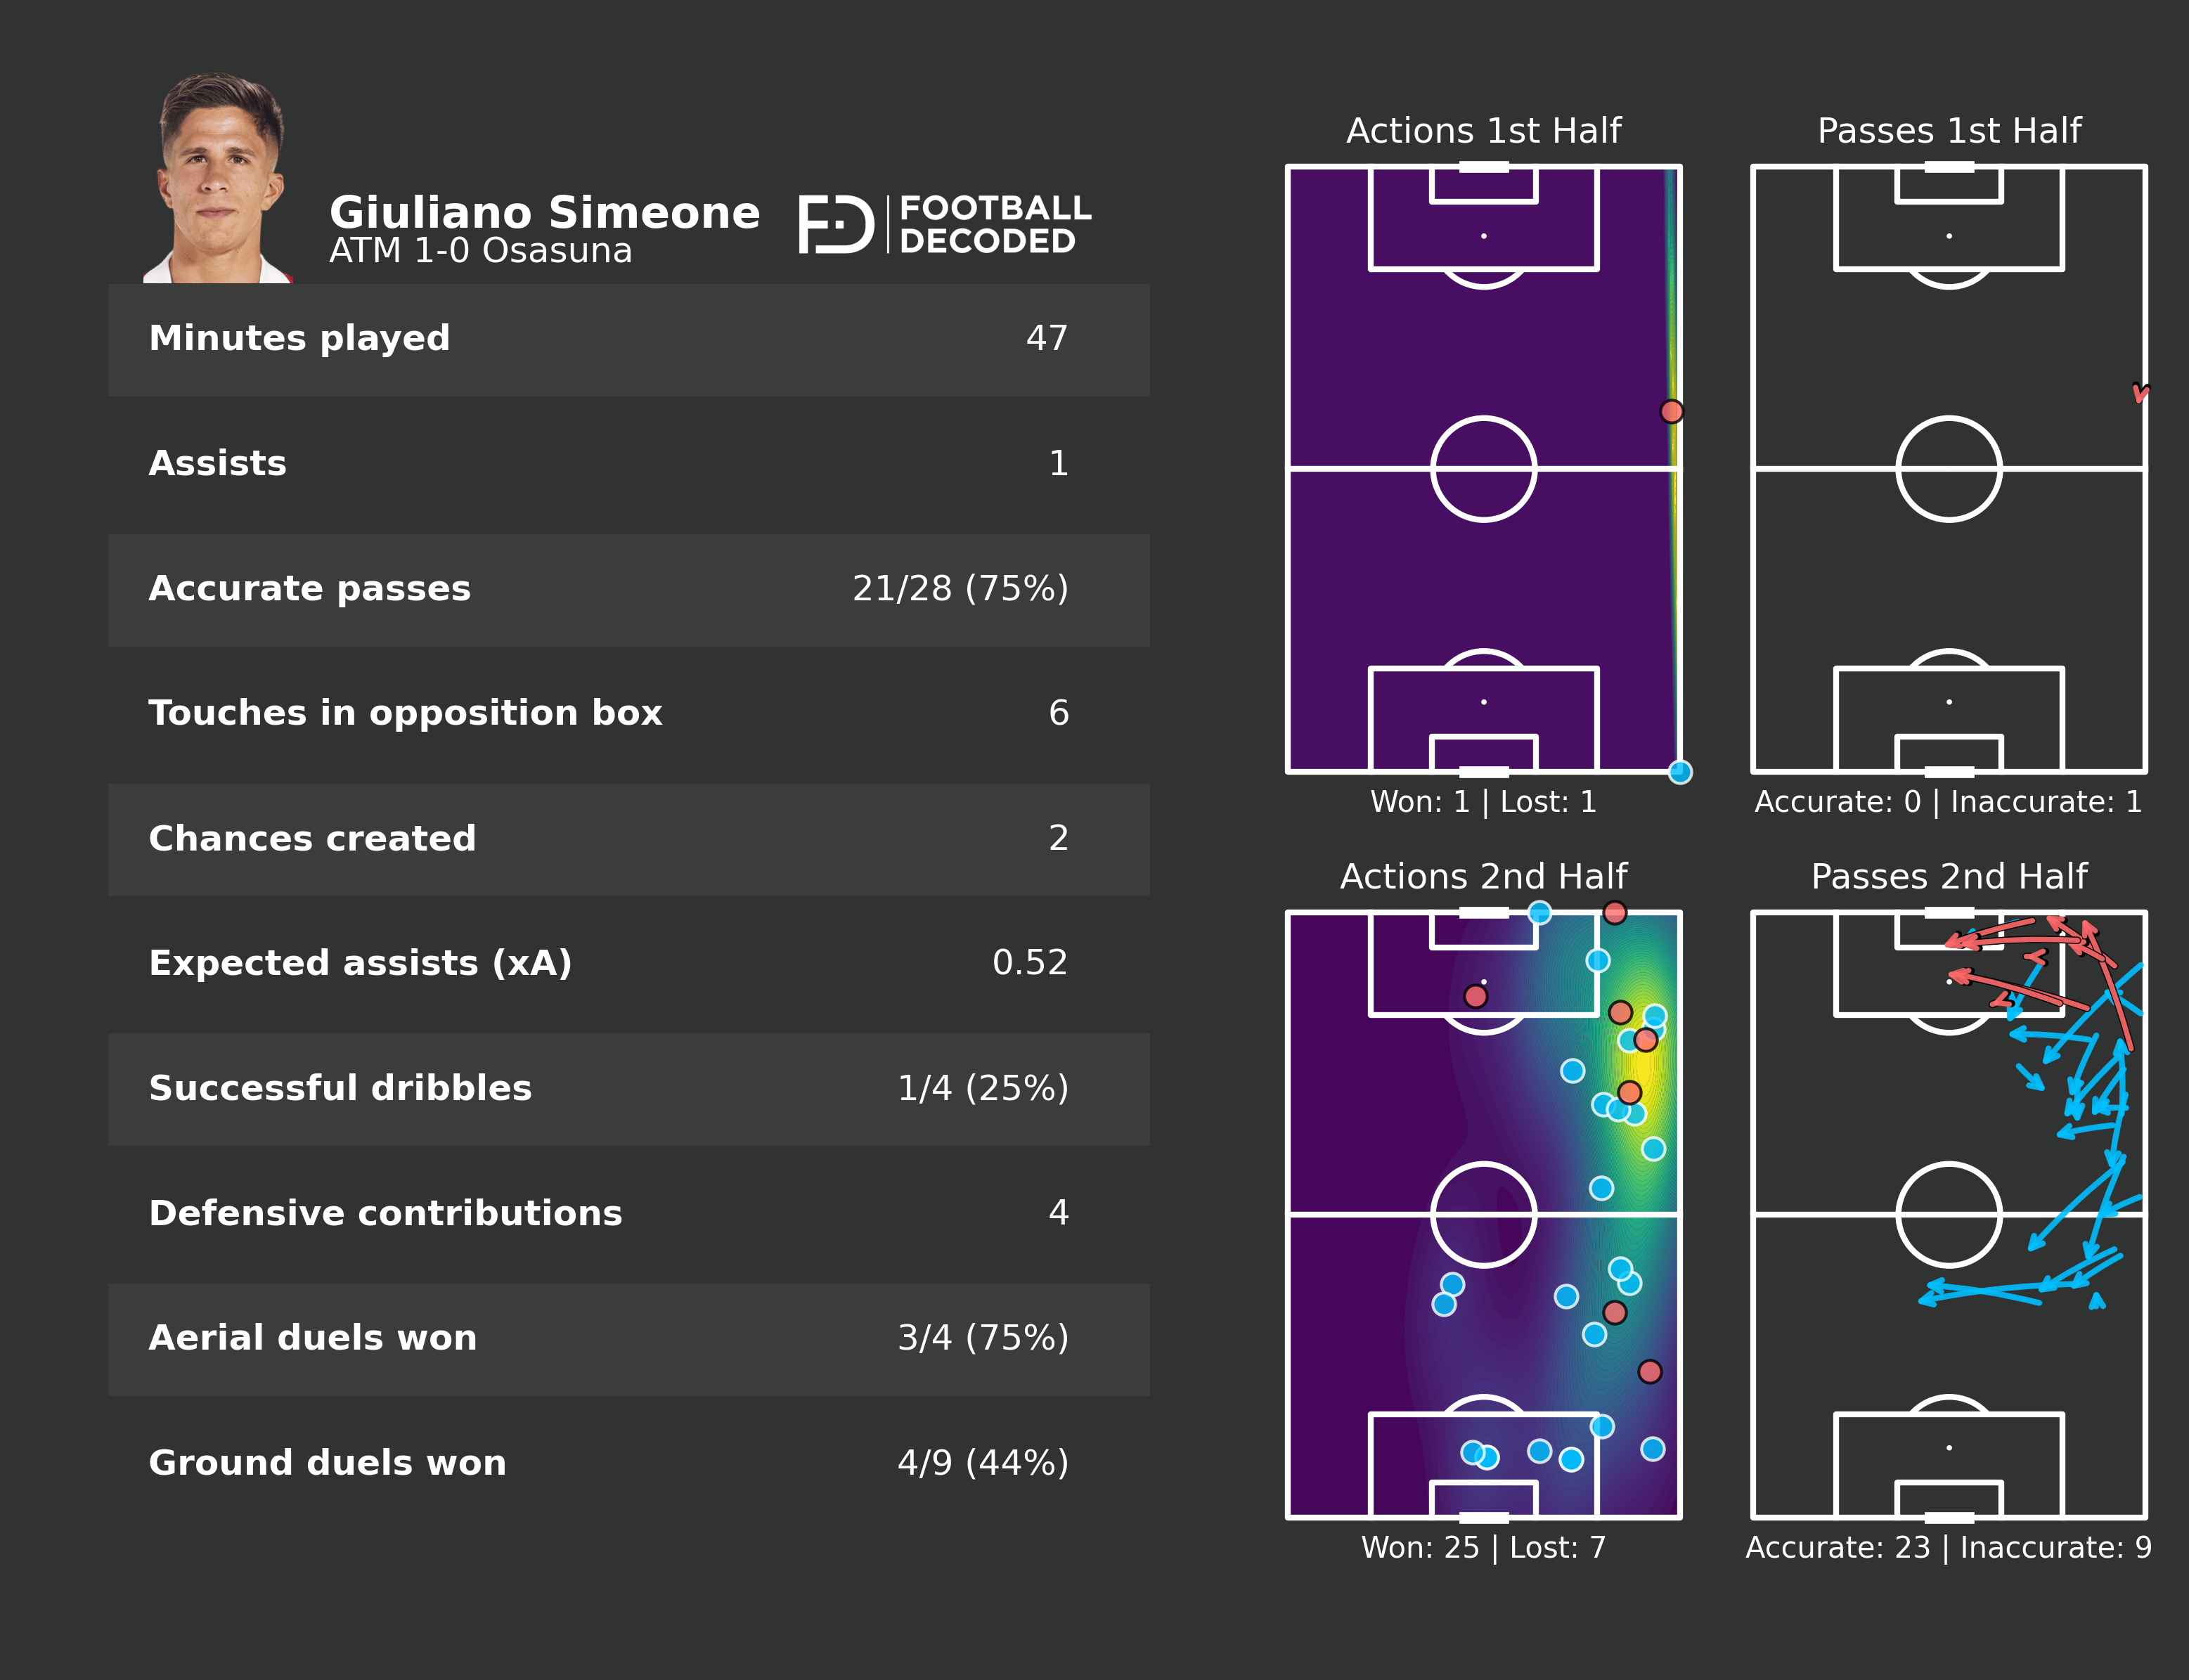

In [15]:
# GIULIANO SIMEONE - Extremo
events = pd.read_csv('../../viz/data/match_events.csv')
aggregates = pd.read_csv('../../viz/data/match_aggregates.csv')

giuliano_enriched = [
    ("Minutes played", "47"),
    ("Assists", "1"),
    ("Accurate passes", "21/28 (75%)"),
    ("Touches in opposition box", "6"),
    ("Chances created", "2"),
    ("Expected assists (xA)", "0.52"),
    ("Successful dribbles", "1/4 (25%)"),
    ("Defensive contributions", "4"),
    ("Aerial duels won", "3/4 (75%)"),
    ("Ground duels won", "4/9 (44%)")
]

fig_giuliano = create_player_analysis_complete(
    player_name='Giuliano Simeone',
    team_name='ATM 1-0 Osasuna',
    enriched_metrics=giuliano_enriched,
    events_df=events,
    player_image_path='../caras/atm/Giuliano.png'
)